**ML - Fall 2023 - Practical - 3**<br>
**Practical Homework 3 - Logistic Regression**

### Full Name : Amirhossein Alamdar
### Student Number : 400105144
### Colab Link:
___

# P1: Introduction (10 points)
The dataset consists of several game result predictor (independent) variables and one target (dependent) variable, `win_or_defeat`. <br> Independent variables include the `spell_used`, `position`, `towers_damage`, `kill_death_ratio`, `controlling_time`, and so on.
  * spell_used
  * trap_used
  * character
  * position
  * location
  * assists
  * damage_amount
  * towers_damage
  * rooms_damage
  * deaths
  * money_total
  * kill_death_ratio
  * kills_total
  * level
  * controlling_time
  * total_damage
  * earned_damage
  * special_enemy_killed
  * room_kills
  * main_score
  * win_or_defeat

First, we perform data exploration to get a better understanding of the data. Then, we perform data preprocessing to prepare the data for the regression model. Finally, we train a regression model to predict the outcome.

In [1]:
data_link = "https://drive.google.com/file/d/1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d/view?usp=sharing"

In [2]:
!pip install typing-extensions --upgrade
!pip install ydata-profiling
!pip install gdown

  Obtaining dependency information for typing-extensions from https://files.pythonhosted.org/packages/b7/f4/6a90020cd2d93349b442bfcb657d0dc91eee65491600b2cb1d388bc98e6b/typing_extensions-4.9.0-py3-none-any.whl.metadata
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
cudf

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

In [4]:
!gdown 1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d

Downloading...
From: https://drive.google.com/uc?id=1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d
To: /kaggle/working/train.csv
100%|█████████████████████████████████████████| 493k/493k [00:00<00:00, 130MB/s]


Load the dataset as a dataframe. Then, check for any null values and remove the rows containing them. Finally, display the first 10 rows. Also check for duplicate rows and delete them, if there are any. Report some other metrics like `Kurtosis` and `Interquartile range (IQR)` (hint: search and read about ydata-profiling). **(P1-1: 5 points)**

In [5]:
df = pd.read_csv('/kaggle/working/train.csv')
print(df.duplicated().sum())
print(df.isnull().sum())
print(len(df))
df = df.dropna()
df = df.drop_duplicates()
print(len(df))
df.head(10)

0
Unnamed: 0              0
spell_used              0
trap_used               0
character               0
position                0
location                1
assists                 1
damage_amount           0
towers_damage           0
rooms_damage            0
deaths                  0
money_total             0
kill_death_ratio        1
kills_total             0
level                   0
controlling_time        0
total_damage            0
earned_damage           0
special_enemy_killed    0
room_kills              0
main_score              0
win_or_defeat           0
dtype: int64
4616
4613


,Unnamed: 0,spell_used,trap_used,character,position,location,assists,damage_amount,towers_damage,rooms_damage,...,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score,win_or_defeat
0,0,4,12,TwistedFate,Side.blue,Lane.top_lane,9.0,1862,5119,1862,...,1.222222,2,13,19,99079,25062,149,1,21,False
2,2,4,12,Ziggs,Side.blue,Lane.bot_lane,3.0,543,2754,543,...,1.750000,4,12,11,106757,10049,168,0,11,False
3,3,4,7,Senna,Side.red,Lane.bot_lane,4.0,1547,1547,1547,...,1.000000,2,12,14,53993,12480,129,1,11,False
5,5,4,11,Rengar,Side.red,Lane.jungle,7.0,1564,16053,1564,...,3.500000,7,14,14,128646,40236,27,1,17,True
6,6,4,12,Ziggs,Side.blue,Lane.bot_lane,9.0,19665,20431,19665,...,5.333333,7,12,11,123192,8057,140,4,9,True
7,7,4,14,Karma,Side.blue,Lane.utility,4.0,740,997,740,...,5.000000,1,10,17,18138,3414,25,0,38,False
8,8,3,4,Zyra,Side.red,Lane.utility,8.0,0,123,0,...,0.900000,1,12,49,32425,24632,30,0,91,False
9,9,4,12,Graves,Side.red,Lane.mid_lane,5.0,3277,3277,3277,...,1.800000,4,12,19,109150,13704,162,1,15,False
10,10,11,4,Olaf,Side.blue,Lane.jungle,3.0,0,7063,0,...,0.500000,2,13,12,106474,38614,19,0,29,False
11,11,14,12,Kled,Side.red,Lane.top_lane,3.0,3646,4463,3646,...,0.636364,4,14,7,119522,41289,178,0,13,False


In [6]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file('rep.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ydata_profiling/model/typeset.py:125: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  not pdt.is_categorical_dtype(series)
/opt/conda/lib/python3.10/site-packages/ydata_profiling/model/typeset_relations.py:34: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pdt.is_categorical_dtype(series):
/opt/conda/lib/python3.10/site-packages/ydata_profiling/model/typeset.py:125: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  not pdt.is_categorical_dtype(series)
/opt/conda/lib/python3.10/site-packages/ydata_profiling/model/typeset_relations.py:34: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inste

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
numeric_columns = df.select_dtypes(include=['number'])
k = numeric_columns.kurtosis()
IQR = numeric_columns.quantile(0.75) - numeric_columns.quantile(0.25)
print("Kurtosis:", k)
print('IQR', IQR)

Kurtosis: Unnamed: 0              -1.199976
spell_used              -0.771228
trap_used               -1.560519
assists                  1.796163
damage_amount           20.631801
towers_damage            3.060186
rooms_damage            20.631801
deaths                   0.372563
money_total              0.326406
kill_death_ratio         9.973199
kills_total              1.438422
level                   -0.384155
controlling_time        11.943538
total_damage             0.696798
earned_damage            1.792284
special_enemy_killed    -1.157044
room_kills               2.527769
main_score               3.950108
dtype: float64
IQR Unnamed: 0               2306.0
spell_used                  7.0
trap_used                   8.0
assists                     7.0
damage_amount            3349.0
towers_damage           11356.0
rooms_damage             3349.0
deaths                      5.0
money_total              4738.0
kill_death_ratio            3.2
kills_total                 6.0
level  

Calculate the mean, standard deviation, min and max value for each non object column. **(P1-2: 5 points)**

In [8]:
numeric_columns = df.select_dtypes(exclude=['object'])
numeric_columns.describe()

,Unnamed: 0,spell_used,trap_used,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score
count,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000
mean,2308.996098,6.707782,8.430739,8.189031,2639.487752,9382.315847,2639.487752,5.740733,10865.129850,3.602712,5.702580,13.826794,18.926295,117652.268806,21465.087145,120.789725,1.032517,30.158899
std,1331.809470,3.976734,4.312468,5.639756,3194.783198,10101.251927,3194.783198,3.020094,3473.747695,3.767723,4.317011,2.373998,14.080420,70408.498868,9907.871328,83.739102,1.313180,20.875652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3093.000000,0.000000,0.000000,6.000000,0.000000,5401.000000,2674.000000,0.000000,0.000000,1.000000
25%,1156.000000,4.000000,4.000000,4.000000,403.000000,2089.000000,403.000000,3.000000,8313.000000,1.300000,2.000000,12.000000,9.000000,67911.000000,14269.000000,32.000000,0.000000,16.000000
50%,2309.000000,4.000000,11.000000,7.000000,1656.000000,5761.000000,1656.000000,5.000000,10479.000000,2.400000,5.000000,14.000000,17.000000,114753.000000,19862.000000,137.000000,1.000000,24.000000
75%,3462.000000,11.000000,12.000000,11.000000,3752.000000,13445.000000,3752.000000,8.000000,13051.000000,4.500000,8.000000,16.000000,26.000000,159956.000000,26898.000000,187.000000,2.000000,36.000000
max,4615.000000,21.000000,21.000000,41.000000,44162.000000,68474.000000,44162.000000,21.000000,28566.000000,33.000000,30.000000,18.000000,193.000000,499423.000000,78861.000000,440.000000,9.000000,174.000000


# P2: Data Exploration (30 points)
In this section, we perform some data exploration to get a better understanding of the data.

1- Show number of unique value for `location` column **(P2-1: 5 points)**

In [9]:
df['location'].nunique()

5

2- Plot correlation matrix between features **(P2-2: 5 points)**

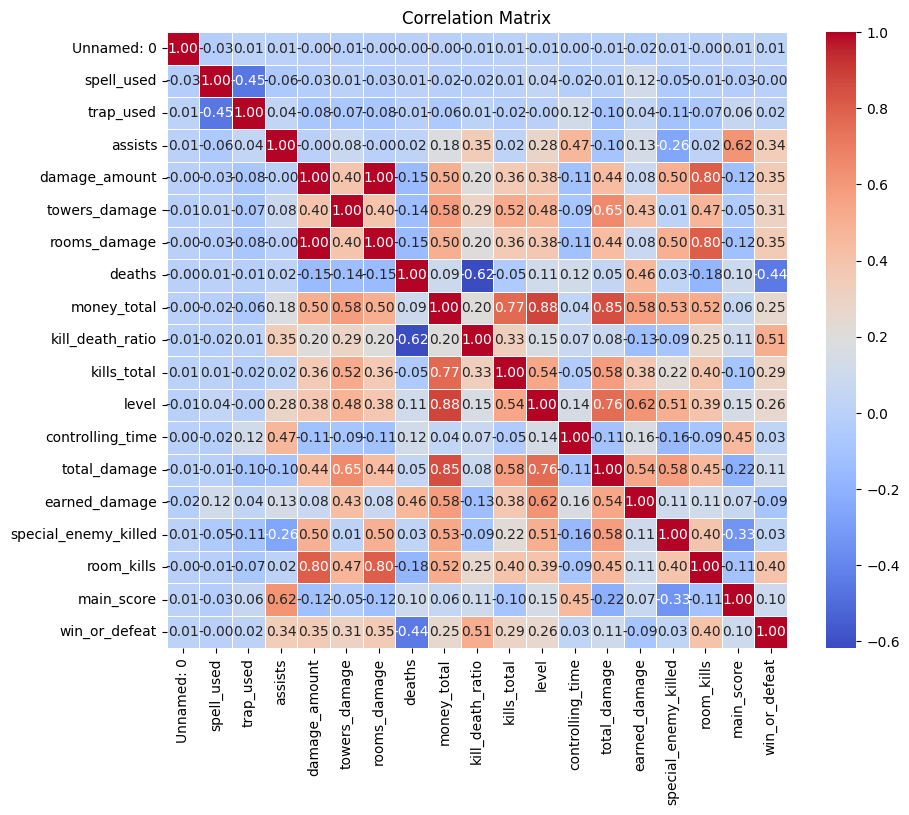

In [10]:
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Matrix')
plt.show()

3- Plot bar plot of combined `position` and `location` columns (hint: use crosstab in pandas) **(P2-3: 5 points)**

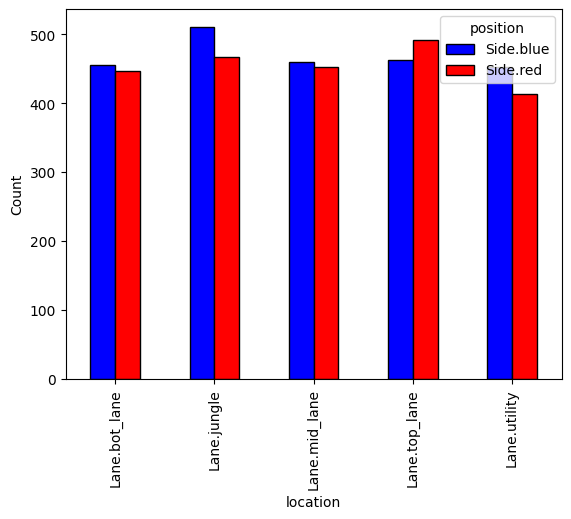

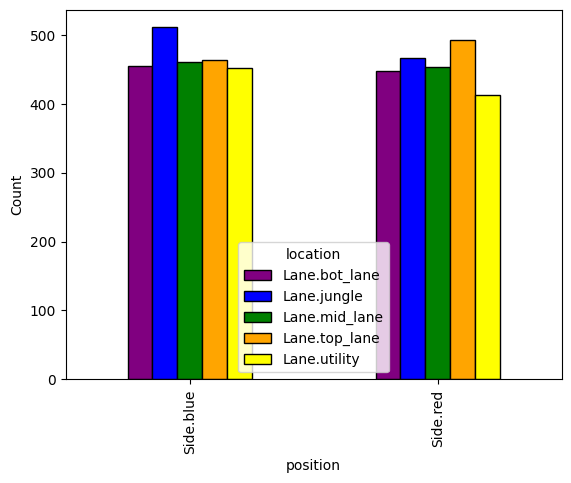

In [11]:
def bar_plot(df, colors, xlabel):
    df.plot(kind='bar', stacked=False, color=colors, edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.show()
    
cmb1 = pd.crosstab(df['location'], df['position'])
cmb2 = pd.crosstab(df['position'], df['location'])

bar_plot(cmb1, ['blue', 'red'], 'location')
bar_plot(cmb2, ['purple','blue','green', 'orange', 'yellow'], 'position')

# cmb.plot(kind='bar', stacked=True, color=['blue', 'red'], edgecolor='black')


4- Plot pie chart of `level` column **(P2-4: 5 points)**

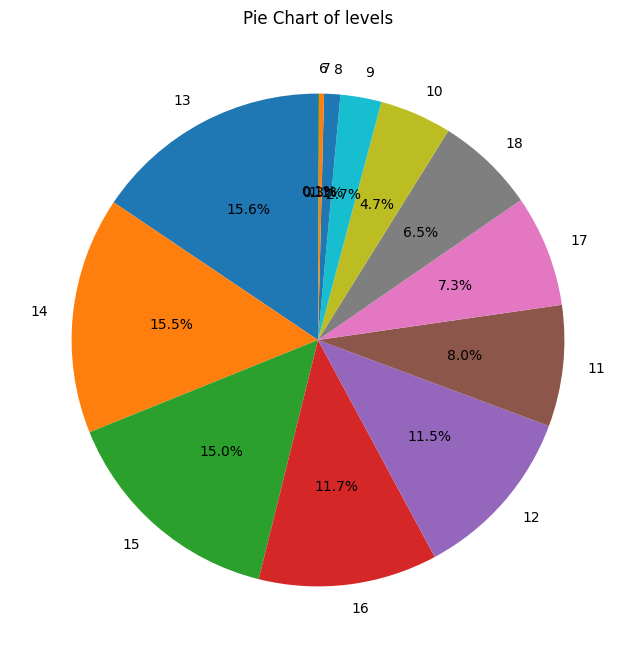

In [12]:
cnt = df['level'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cnt, labels = cnt.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of levels')
plt.show()

5- Plot box-plot on combination of `location` and `earned_damage` columns **(P2-5: 5 points)**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


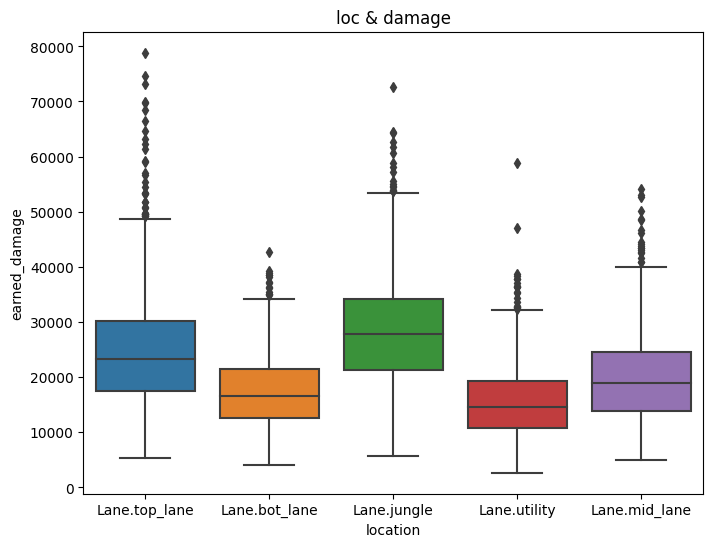

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='location', y='earned_damage')
plt.title('loc & damage')
plt.xlabel('location')
plt.ylabel('earned_damage')
plt.show()

6- Plot histplot of `spell_used` column (10 bins). **(P2-6: 5 points)**

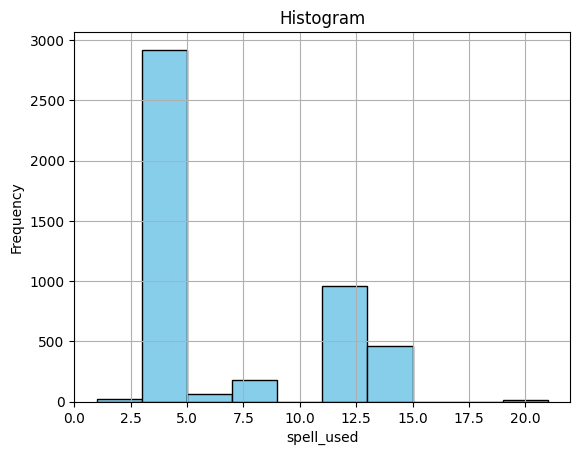

In [14]:
df['spell_used'].hist(bins=10, color='skyblue', edgecolor='black')

plt.xlabel('spell_used')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.show()

# P3: Pre-processing (15 points)
In this section, we perform some pre-processing to make the data ready for model.

First of all, in your heatmap, there are some variables that have very low correlation with your dependent variable. You can delete those features that their absulote value of correlation with dependent variable is less than 0.015. **(P3-1: 5 points)**

In [15]:
colsss = correlation_matrix[abs(correlation_matrix['win_or_defeat']) < 0.015].index.tolist()
df_new = df.drop(colsss, axis = 1)
df_new.head()

,trap_used,character,position,location,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score,win_or_defeat
0,12,TwistedFate,Side.blue,Lane.top_lane,9.0,1862,5119,1862,9,9152,1.222222,2,13,19,99079,25062,149,1,21,False
2,12,Ziggs,Side.blue,Lane.bot_lane,3.0,543,2754,543,4,9014,1.750000,4,12,11,106757,10049,168,0,11,False
3,7,Senna,Side.red,Lane.bot_lane,4.0,1547,1547,1547,6,8155,1.000000,2,12,14,53993,12480,129,1,11,False
5,11,Rengar,Side.red,Lane.jungle,7.0,1564,16053,1564,4,11536,3.500000,7,14,14,128646,40236,27,1,17,True
6,12,Ziggs,Side.blue,Lane.bot_lane,9.0,19665,20431,19665,3,10699,5.333333,7,12,11,123192,8057,140,4,9,True


Next step is to encode labels. Columns that are not numeric ('string' or 'object'), can't be given to the model, so you should convert them to numeric values <br> (hint: use sklearn LabelEncoder). **(P3-2: 5 points)**

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
obs = df_new.select_dtypes(include=['object', 'string', 'bool'])
df_new[obs.columns] = df_new[obs.columns].apply(label_encoder.fit_transform)
df_new.head()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

,trap_used,character,position,location,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score,win_or_defeat
0,12,129,0,3,9.0,1862,5119,1862,9,9152,1.222222,2,13,19,99079,25062,149,1,21,0
2,12,153,0,0,3.0,543,2754,543,4,9014,1.750000,4,12,11,106757,10049,168,0,11,0
3,7,105,1,0,4.0,1547,1547,1547,6,8155,1.000000,2,12,14,53993,12480,129,1,11,0
5,11,99,1,1,7.0,1564,16053,1564,4,11536,3.500000,7,14,14,128646,40236,27,1,17,1
6,12,153,0,0,9.0,19665,20431,19665,3,10699,5.333333,7,12,11,123192,8057,140,4,9,1


now we need to normalize columns of the dataframe which causes our model to converge better and prevent focusing on some specific number of columns. we use 'Z normalization' for this purpose.

be careful not to normalize 'win_or_defeat' column!

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
n_cols = df_new.columns[df_new.columns != 'win_or_defeat']
df_new[n_cols] = scaler.fit_transform(df_new[n_cols])

df_new.head()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

,trap_used,character,position,location,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score,win_or_defeat
0,0.827751,1.135156,-0.985152,0.731026,0.143811,-0.243388,-0.422104,-0.243388,1.079311,-0.493218,-0.631880,-0.857765,-0.348308,0.005235,-0.263822,0.363075,0.336919,-0.024765,-0.438784,0
2,0.827751,1.671426,-0.985152,-1.416887,-0.920181,-0.656293,-0.656259,-0.656293,-0.576446,-0.532949,-0.491786,-0.394431,-0.769585,-0.562991,-0.154760,-1.152349,0.563839,-0.786357,-0.917862,0
3,-0.331804,0.598886,1.015071,-1.416887,-0.742849,-0.341997,-0.775762,-0.341997,0.085857,-0.780259,-0.690867,-0.857765,-0.769585,-0.349906,-0.904240,-0.906962,0.098057,-0.024765,-0.917862,0
5,0.595840,0.464819,1.015071,-0.700916,-0.210853,-0.336675,0.660454,-0.336675,-0.576446,0.193147,-0.027264,0.300569,0.072968,-0.349906,0.156159,1.894751,-1.120144,-0.024765,-0.630415,1
6,0.827751,1.671426,-0.985152,-1.416887,0.143811,5.329738,1.093912,5.329738,-0.907597,-0.047830,0.459378,0.300569,-0.769585,-0.562991,0.078688,-1.353423,0.229431,2.260014,-1.013678,1


# P4: Regression Model (30 points)

Split the data to train, test, and validation using sklearn's `train_test_split`. Use 10% of the data for the testing phase, another 10% for the validation phase, and the remaining for the training phase.

In [18]:
dff = df_new.copy()
X = dff[dff.columns[dff.columns != 'win_or_defeat']].values
y = dff['win_or_defeat'].values
# y = np.reshape(y, (len(y), 1))

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Custom Regression Model

1- Complete custom logistic regression functions below **(P4-1: 10 points)**

In [19]:
from sklearn.metrics import accuracy_score
import warnings

class CustomLogisticRegression():
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.bias = None
        self.weights = None
        
    def semi_pred(self, X):
        z = X @ self.weights + self.bias
        return self.sigmoid(z)
    
    def sigmoid(self, z):
        warnings.filterwarnings('ignore')
        return 1 / (1 + np.exp(-z))

    def loss(self, X, y):
        preds = self.semi_pred(X)
        epsilon = 1e-10 
        preds = np.clip(preds, epsilon, 1 - epsilon)
        return (-1/X.shape[0]) * np.sum(y * np.log(preds) + (1-y) * np.log(1 - preds))


    def loss_backward(self, X, y):
        m = X.shape[0]
        preds = self.semi_pred(X)
        
        dz = preds - y
        dw = (1/m) * np.dot(X.T, dz)
        db = (1/m) * np.sum(dz)
    
        return dw, db
        
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros((n))
        self.bias = 0
        
        for _ in range(self.num_iterations):
            dw, db = self.loss_backward(X, y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

#             # Print the cost every 100 iterations
#             if _ % 100 == 0:
#                 print(f"Cost after iteration {_}: {cost}")
              
    

    def predict(self, X):
        return (self.semi_pred(X) > 0.5).astype(int)


### Torch Regression Model

2- Implement the Logistic Regression Model. This time, use Pytorch! **(P4-2: 10 points)**

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class TorchLogisticRegression():

    def __init__(self, learning_rate=0.08, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        
    def loss(self, pred, y):
        return self.loss(pred, y)

    def predict(self, X):
        with torch.no_grad():
            Xt = torch.FloatTensor(X)
            res = (F.sigmoid(self.model(Xt)) > 0.5).float()
        return res.numpy().astype(int)
    
    def fit(self, X_train, Y_train):
        m, n = X_train.shape
        self.model = nn.Sequential(nn.Linear(n, 1))
        optimizer = torch.optim.SGD(self.model.parameters(), lr = self.learning_rate)
        self.loss = nn.BCEWithLogitsLoss()
        X_ttrain = torch.FloatTensor(X_train)
        y_ttrain = torch.FloatTensor(y_train.reshape(-1, 1))
        
        for _ in range(self.num_iterations):
            optimizer.zero_grad()
            loss = self.loss(self.model(X_ttrain), y_ttrain)
            loss.backward()
            optimizer.step()
            
            if _ % 100 ==0:
                print('epoch: ', _, 'loss: ', loss)
                with torch.no_grad():
                    X_valp = torch.FloatTensor(X_val)
                    y_valp = torch.FloatTensor(np.reshape(y_val, (-1, 1)))
                    loss = self.loss(self.model(X_valp), y_valp)
                print('loss on val', loss.detach().item())




### SK-Learn Regression Model

3- Now train a Logistic Regression using SK-Learn **(P4-3: 5 points)**

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
sk_res = clf.predict(X_test)

### Predicting the output for the testing data
4- Train Custom Logistic Regression and Torch Logistic Regression models and then Predict the `Outcome` for the testing samples using both models. **(P4-4: 5 points)**

In [22]:
my_model = CustomLogisticRegression()
my_model.fit(X_train, y_train)
my_res = my_model.predict(X_test)


torch_model = TorchLogisticRegression()
torch_model.fit(X_train, y_train)
torch_res  = torch_model.predict(X_test)

epoch:  0 loss:  tensor(0.7419, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss on val 0.7226649522781372
epoch:  100 loss:  tensor(0.3993, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss on val 0.3761313557624817
epoch:  200 loss:  tensor(0.3804, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss on val 0.35528454184532166
epoch:  300 loss:  tensor(0.3733, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss on val 0.34804511070251465
epoch:  400 loss:  tensor(0.3694, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss on val 0.34456735849380493
epoch:  500 loss:  tensor(0.3670, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss on val 0.3425862491130829
epoch:  600 loss:  tensor(0.3653, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss on val 0.34129980206489563
epoch:  700 loss:  tensor(0.3640, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss on val 0.3403724730014801
epoch:  800 loss:  tensor(0.3630, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
los

# P5: Evaluation (10 points)

1- Complete the metric codes. then evaluate all the models results using the implemented metrices and compare them. **(P5-1: 10 points)**

In [23]:
class ClassificationFullReport:

    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def accuracy(self):
        correct_predictions = sum(1 for true, pred in zip(self.y_true, self.y_pred) if true == pred)
        total_samples = len(self.y_true)
        return correct_predictions / total_samples

    def precision(self):
        true_positive = sum(1 for true, pred in zip(self.y_true, self.y_pred) if true == pred == 1)
        predicted_positive = sum(1 for pred in self.y_pred if pred == 1)
        return true_positive / predicted_positive if predicted_positive != 0 else 0

    def recall(self):
        true_positive = sum(1 for true, pred in zip(self.y_true, self.y_pred) if true == pred == 1)
        actual_positive = sum(1 for true in self.y_true if true == 1)
        return true_positive / actual_positive if actual_positive != 0 else 0

    def f1_score(self):
        precision = self.precision()
        recall = self.recall()
        return 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    def confusion_matrix(self):
        true_positive = sum(1 for true, pred in zip(self.y_true, self.y_pred) if true == pred == 1)
        true_negative = sum(1 for true, pred in zip(self.y_true, self.y_pred) if true == pred == 0)
        false_positive = sum(1 for true, pred in zip(self.y_true, self.y_pred) if true == 0 and pred == 1)
        false_negative = sum(1 for true, pred in zip(self.y_true, self.y_pred) if true == 1 and pred == 0)

        return {'True Positive': true_positive,
                'True Negative': true_negative,
                'False Positive': false_positive,
                'False Negative': false_negative}
sk = ClassificationFullReport(y_test, sk_res)
my = ClassificationFullReport(y_test, my_res)
tch = ClassificationFullReport(y_test, torch_res)

In [24]:
print('sk')
print('acc', sk.accuracy())
print('precision', sk.precision())
print('recall', sk.recall())
print('f1_score', sk.f1_score())
print('conf_mat', sk.confusion_matrix())


sk
acc 0.8255687973997833
precision 0.8457943925233645
recall 0.7921225382932167
f1_score 0.8180790960451977
conf_mat {'True Positive': 362, 'True Negative': 400, 'False Positive': 66, 'False Negative': 95}


In [25]:
print('torch')
print('acc', tch.accuracy())
print('precision', tch.precision())
print('recall', tch.recall())
print('f1_score', tch.f1_score())
print('conf_mat', tch.confusion_matrix())

torch
acc 0.8201516793066089
precision 0.8391608391608392
recall 0.787746170678337
f1_score 0.8126410835214446
conf_mat {'True Positive': 360, 'True Negative': 397, 'False Positive': 69, 'False Negative': 97}


In [26]:
print('scratch')
print('acc', my.accuracy())
print('precision', my.precision())
print('recall', my.recall())
print('f1_score', my.f1_score())
print('conf_mat', my.confusion_matrix())

scratch
acc 0.8158179848320694
precision 0.8408551068883611
recall 0.774617067833698
f1_score 0.806378132118451
conf_mat {'True Positive': 354, 'True Negative': 399, 'False Positive': 67, 'False Negative': 103}


# P6: Neural Net (5 points)

Implement a neural net containing the following layers: LSTM, CNN, Pooling and Dense (Linear). Train the neural network on the training data and tune its hyperparameters using the validation data. Finally, print a classification report indicating how well its doing on the testing data. **(P6-1: 5 points)**

In [27]:
# !pip install --upgrade tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Dense, Flatten
# n_features = 19

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val_reshaped = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(64, input_shape= X_train_reshaped.shape[1:], return_sequences = True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')





Epoch 1/15
93/93 [==============================] - 13s 13ms/step - loss: 0.5380 - accuracy: 0.7348 - val_loss: 0.3685 - val_accuracy: 0.8537
Epoch 2/15
93/93 [==============================] - 1s 6ms/step - loss: 0.3845 - accuracy: 0.8283 - val_loss: 0.3418 - val_accuracy: 0.8740
Epoch 3/15
93/93 [==============================] - 1s 6ms/step - loss: 0.3653 - accuracy: 0.8337 - val_loss: 0.3396 - val_accuracy: 0.8645
Epoch 4/15
93/93 [==============================] - 1s 6ms/step - loss: 0.3550 - accuracy: 0.8398 - val_loss: 0.3257 - val_accuracy: 0.8631
Epoch 5/15
93/93 [==============================] - 1s 6ms/step - loss: 0.3470 - accuracy: 0.8381 - val_loss: 0.3270 - val_accuracy: 0.8604
Epoch 6/15
93/93 [==============================] - 1s 6ms/step - loss: 0.3450 - accuracy: 0.8388 - val_loss: 0.3231 - val_accuracy: 0.8767
Epoch 7/15
93/93 [==============================] - 1s 6ms/step - loss: 0.3424 - accuracy: 0.8418 - val_loss: 0.3247 - val_accuracy: 0.8618
Epoch 8/15
93/93 [

In [28]:
df = pd.read_csv('/kaggle/input/comp-testt/test (2).csv')
print(df.duplicated().sum())
print(df.isnull().sum())
print(len(df))
df = df.dropna()
df = df.drop_duplicates()
print(len(df))
df = df.drop(['ID'], axis = 1)
df.head(10)

0
ID                      0
spell_used              0
trap_used               0
character               0
position                0
location                0
assists                 0
damage_amount           0
towers_damage           0
rooms_damage            0
deaths                  0
money_total             0
kill_death_ratio        0
kills_total             0
level                   0
controlling_time        0
total_damage            0
earned_damage           0
special_enemy_killed    0
room_kills              0
main_score              0
dtype: int64
1155
1155


,spell_used,trap_used,character,position,location,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score
0,4,11,Graves,Side.red,Lane.jungle,5,0,4974,0,7,14891,2.142857,10,17,29,238434,33104,100,0,27
1,4,12,Kennen,Side.red,Lane.top_lane,7,94,2228,94,7,12928,1.857143,6,16,22,125049,24663,218,0,23
2,4,12,Yone,Side.blue,Lane.top_lane,6,1920,5603,1920,6,11621,1.000000,0,15,23,163515,19090,220,1,27
3,4,12,Jayce,Side.blue,Lane.top_lane,5,8373,14605,8373,4,11556,2.250000,4,15,8,138301,15240,177,4,32
4,4,12,Orianna,Side.red,Lane.mid_lane,12,2778,2778,2778,10,12534,1.600000,4,15,30,178520,21116,219,1,40
5,11,4,Kayn,Side.blue,Lane.jungle,6,0,8348,0,4,6937,2.750000,5,11,5,94611,16470,4,0,13
6,4,14,Twitch,Side.blue,Lane.bot_lane,10,9409,9409,9409,7,15435,3.571429,15,15,19,183105,22753,190,3,21
7,7,4,Janna,Side.blue,Lane.utility,11,684,684,684,4,5240,3.250000,2,8,19,12310,6606,11,1,32
8,4,7,Corki,Side.red,Lane.bot_lane,10,987,2748,987,7,11769,1.714286,2,14,8,166123,18929,213,1,14
9,4,12,Ryze,Side.red,Lane.mid_lane,2,920,7423,920,10,9755,0.600000,4,13,29,132475,29243,172,1,16


In [29]:
df_new = df.drop(colsss[1], axis = 1)
df_new.head()


,trap_used,character,position,location,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score
0,11,Graves,Side.red,Lane.jungle,5,0,4974,0,7,14891,2.142857,10,17,29,238434,33104,100,0,27
1,12,Kennen,Side.red,Lane.top_lane,7,94,2228,94,7,12928,1.857143,6,16,22,125049,24663,218,0,23
2,12,Yone,Side.blue,Lane.top_lane,6,1920,5603,1920,6,11621,1.000000,0,15,23,163515,19090,220,1,27
3,12,Jayce,Side.blue,Lane.top_lane,5,8373,14605,8373,4,11556,2.250000,4,15,8,138301,15240,177,4,32
4,12,Orianna,Side.red,Lane.mid_lane,12,2778,2778,2778,10,12534,1.600000,4,15,30,178520,21116,219,1,40


In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
obs = df_new.select_dtypes(include=['object', 'string', 'bool'])
df_new[obs.columns] = df_new[obs.columns].apply(label_encoder.fit_transform)
df_new.head()


,trap_used,character,position,location,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score
0,11,33,1,1,5,0,4974,0,7,14891,2.142857,10,17,29,238434,33104,100,0,27
1,12,54,1,3,7,94,2228,94,7,12928,1.857143,6,16,22,125049,24663,218,0,23
2,12,135,0,3,6,1920,5603,1920,6,11621,1.000000,0,15,23,163515,19090,220,1,27
3,12,43,0,3,5,8373,14605,8373,4,11556,2.250000,4,15,8,138301,15240,177,4,32
4,12,79,1,2,12,2778,2778,2778,10,12534,1.600000,4,15,30,178520,21116,219,1,40


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
n_cols = df_new.columns[df_new.columns != 'win_or_defeat']
df_new[n_cols] = scaler.fit_transform(df_new[n_cols])

df_new.head()

,trap_used,character,position,location,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score
0,0.530840,-0.950401,1.021884,-0.746747,-0.578477,-0.855878,-0.437169,-0.855878,0.387361,1.176109,-0.395245,0.966862,1.344114,0.630053,1.764044,1.128197,-0.217606,-0.820617,-0.156286
1,0.761684,-0.429382,1.021884,0.704040,-0.235401,-0.825814,-0.704441,-0.825814,0.387361,0.604436,-0.464487,0.054877,0.917147,0.205094,0.131033,0.299115,1.232285,-0.820617,-0.353727
2,0.761684,1.580264,-0.978584,0.704040,-0.406939,-0.241806,-0.375948,-0.241806,0.068016,0.223806,-0.672215,-1.313101,0.490180,0.265803,0.685034,-0.248270,1.256859,-0.037301,-0.156286
3,0.761684,-0.702296,-0.978584,0.704040,-0.578477,1.822051,0.500229,1.822051,-0.570674,0.204876,-0.369279,-0.401116,0.490180,-0.644823,0.321893,-0.626421,0.728509,2.312648,0.090515
4,0.761684,0.190879,1.021884,-0.021354,0.622290,0.032607,-0.650909,0.032607,1.345397,0.489693,-0.526806,-0.401116,0.490180,0.690762,0.901141,-0.049275,1.244572,-0.037301,0.485397


In [32]:
X_eval = df_new.values
X_eval.shape

(1155, 19)

In [33]:
X_eval_reshaped = np.reshape(X_eval, (X_eval.shape[0], X_eval.shape[1], 1))
pred = model.predict(X_eval_reshaped)

37/37 [==============================] - 1s 3ms/step


In [34]:
res = pred[:, 1] > pred[:, 0]

DF = pd.DataFrame(res, columns=['target'])

DF.to_csv("res3.csv", index=False)